# **CO2 Emission Prediction from Vehicle Specifications**

**CO2 Emission Prediction with Linear Regression Model**

The **Linear Regression Model** is typically used for numerical data, where the increase or decrease of one variable is influenced by the changes in another variable.

**Objective**

To predict **CO2 emissions** and identify which variables have the most significant impact on changes in CO2 emissions.

**Data**

The dataset used in this project comes from Kaggle, titled *Vehicle CO2 Emissions Dataset*.

You can access the dataset by clicking [here](https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset).

**Overview**

This dataset contains information about engine specifications, fuel consumption, and CO2 emissions, which are used to analyze the variables that influence CO2 emissions.

| Variable                               | Description                                                                                    |
| -------------------------------------- | ---------------------------------------------------------------------------------------------- |
| **Make**                               | The manufacturer or brand that produces the vehicle                                            |
| **Model**                              | The specific vehicle model or type                                                             |
| **Vehicle Class**                      | The class or category of the vehicle (e.g., sedan, SUV, etc.)                                  |
| **Engine Size**                        | Engine size measured in liters (L)                                                             |
| **Cylinders**                          | Number of cylinders in the engine                                                              |
| **Transmission**                       | Type of transmission and how engine power is delivered                                         |
| **Fuel Type**                          | Type of fuel used by the vehicle. Different fuel types affect efficiency, cost, and emissions. |
| **Fuel_Consumption_City_L_per_100_km** | Fuel consumption in the city (L/100 km)                                                        |
| **Fuel_Consumption_Hwy_L_per_100_km**  | Fuel consumption on the highway (L/100 km)                                                     |
| **Fuel_Consumption_Comb_L_per_100_km** | Combined fuel consumption (L/100 km)                                                           |
| **Fuel_Consumption_Comb_mpg**          | Combined fuel consumption in miles per gallon (mpg)                                            |
| **CO2_Emissions_g_per_km**             | **Target variable** — CO2 emissions in grams per kilometer                                     |


**Import Libraries and Load Data**
-

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
from google.colab import files
uploaded = files.upload()

Saving co2.csv to co2 (2).csv


In [35]:
df = pd.read_csv('co2.csv')

In [36]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

**Data Cleaning**

Cleaning missing values and eliminating unnecessary variables

In [38]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


The *Model* column contains too many unique values, which would make it difficult for the model to perform predictions.

Therefore, the *Model* column will be removed to improve the prediction model’s efficiency.


In [39]:
df.drop(['Model'], axis=1, inplace=True)
df.columns = df.columns.str.lower()
df.head()

,make,vehicle class,engine size(l),cylinders,transmission,fuel type,fuel consumption city (l/100 km),fuel consumption hwy (l/100 km),fuel consumption comb (l/100 km),fuel consumption comb (mpg),co2 emissions(g/km)
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Exploratory Data Analysis**
-

In [40]:
df.describe()

,engine size(l),cylinders,fuel consumption city (l/100 km),fuel consumption hwy (l/100 km),fuel consumption comb (l/100 km),fuel consumption comb (mpg),co2 emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<Axes: xlabel='co2 emissions(g/km)', ylabel='Count'>

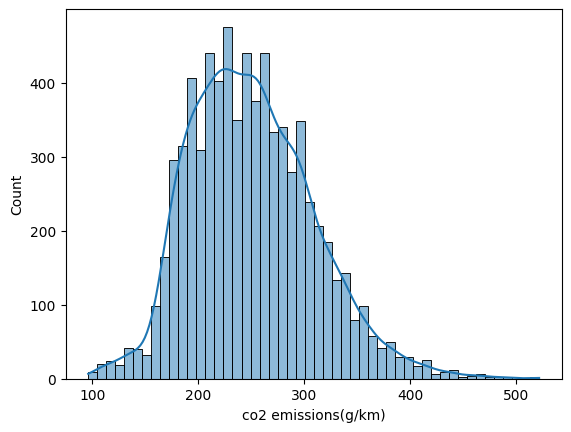

In [41]:
sns.histplot(df['co2 emissions(g/km)'], bins=50, kde=True)

In [42]:
df['co2 emissions(g/km)'].skew()

np.float64(0.5260938068064506)

In [43]:
num_corr = df.select_dtypes(include=['number']).corr()['co2 emissions(g/km)']

df_encoded = pd.get_dummies(df[['make','vehicle class','transmission','fuel type']], drop_first=True)
cat_corr = df_encoded.corrwith(df['co2 emissions(g/km)'])

all_corr = pd.concat([num_corr, cat_corr])
all_corr.sort_values(ascending=False)


,0
co2 emissions(g/km),1.000000
fuel consumption city (l/100 km),0.919592
fuel consumption comb (l/100 km),0.918052
fuel consumption hwy (l/100 km),0.883536
engine size(l),0.851145
...,...
make_HONDA,-0.178231
vehicle class_MID-SIZE,-0.204665
fuel type_X,-0.260382
transmission_AV,-0.267980


<Figure size 600x1200 with 0 Axes>

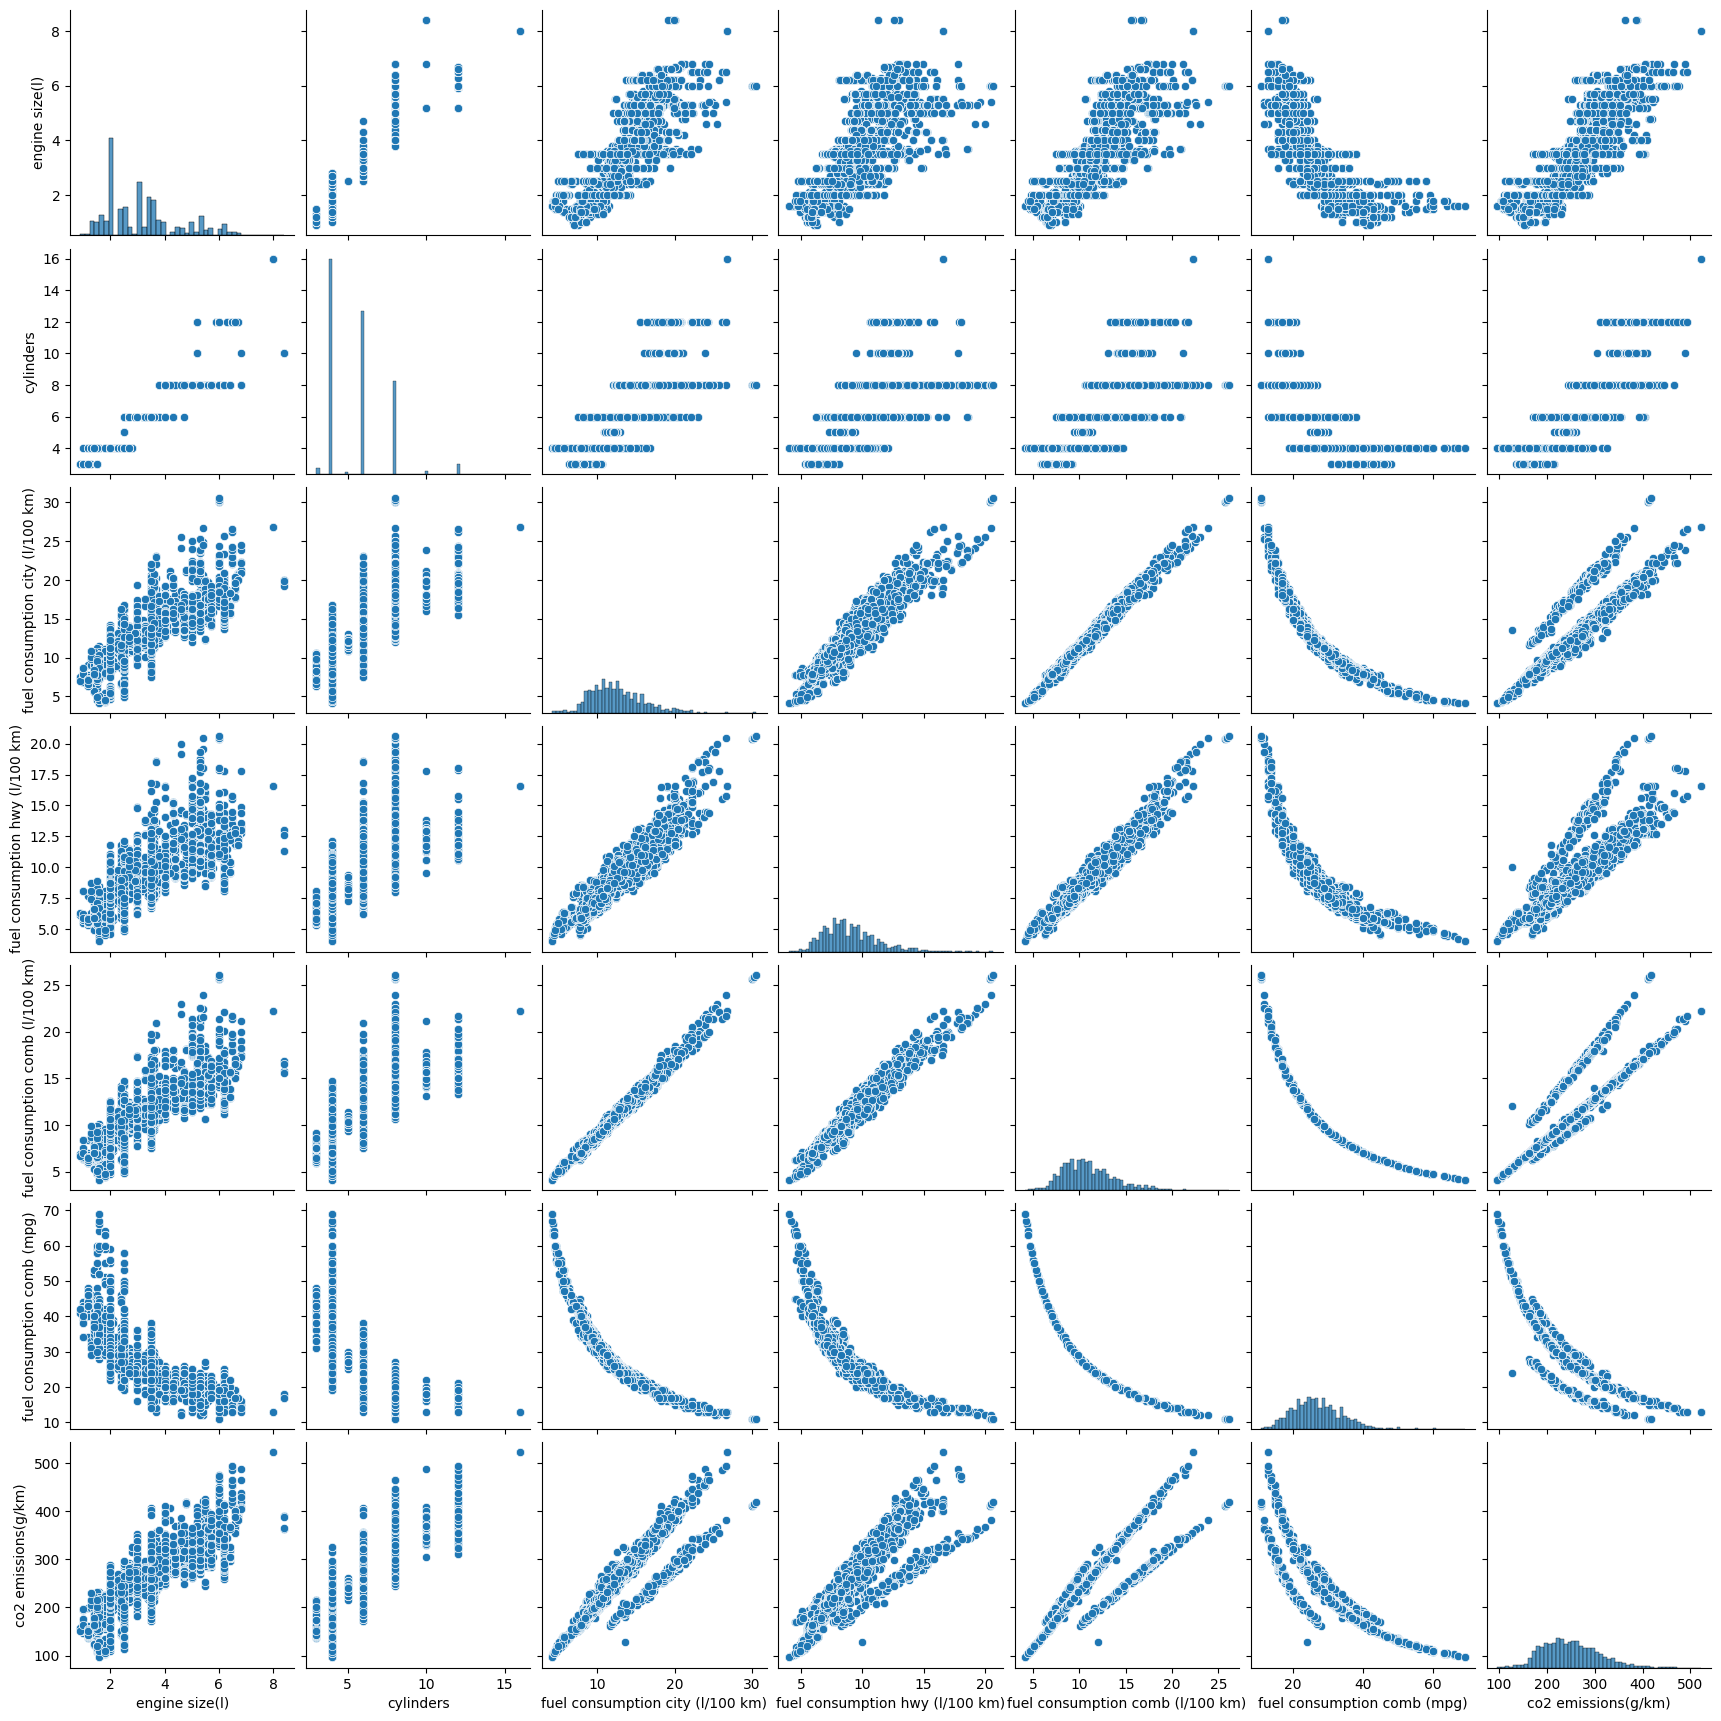

In [44]:
plt.figure(figsize=(6, 12))
sns.pairplot(df)
plt.show()

**Data Preparation**
-

In the data preparation stage, we need to separate the dataset into **target variables** and **feature variables**. Then, we need to split the data into **training** and **testing**


In [45]:
print(df.columns)

Index(['make', 'vehicle class', 'engine size(l)', 'cylinders', 'transmission',
       'fuel type', 'fuel consumption city (l/100 km)',
       'fuel consumption hwy (l/100 km)', 'fuel consumption comb (l/100 km)',
       'fuel consumption comb (mpg)', 'co2 emissions(g/km)'],
      dtype='object')


In [46]:
cat_cols = ['make','vehicle class','transmission','fuel type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [47]:
y = df['co2 emissions(g/km)']
X = df.drop(columns='co2 emissions(g/km)')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
print('X_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

X_train_shape (5908, 92)
X_test_shape (1477, 92)
y_train_shape (5908,)
y_test_shape (1477,)


**Regression Models**
---

I used several different models such as Ridge, Lasso, ElasticNet, and Linear Regression to find the model with the best performance.

**Linear Regression**

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
model.predict(X_test)

array([240.22282154, 228.07668041, 255.39335045, ..., 240.62595512,
       134.48475467, 227.99021308])

In [56]:
pred = model.predict(X_test)

Evaluating Linear Regression Model Performance

In [59]:
print("r2 Score: ", r2_score(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("MSE: ", metrics.mean_squared_error(y_test, pred))

r2 Score:  0.9941857443729017
RMSE:  4.462895938890906
MAE:  2.8898179096495777
MSE:  19.91744016136894


In [60]:
print("Intercept: ", model.intercept_)
print("Coef: ", model.coef_)

Intercept:  250.49779959377113
Coef:  [ 8.60197958e-01  1.45081220e+00  2.13881779e+01  1.23563143e+01
  2.30261659e+01 -7.03987759e+00  1.94117486e-01  4.84576871e-01
  3.27348205e-01  7.19434703e-01  4.84306318e-01  4.78367672e-01
  4.70697596e-01  4.46536756e-01  1.19652998e+00  7.64855924e-01
  1.07601047e+00  4.26204112e-01  1.62221761e+00  3.74485192e-01
  7.88579338e-01  5.60696363e-01  8.38322165e-01  3.01005129e-01
  3.75952108e-01  8.34467865e-01  8.80325612e-01  7.32274586e-01
  9.15518958e-02  3.20636478e-01  6.46578264e-01  6.66995801e-01
  4.97951978e-01  6.25439903e-01  4.23291135e-01  3.47102561e-01
  5.83305880e-01  3.66271162e-01  5.95687469e-01  7.02632514e-01
  1.15159310e-01 -4.92744480e-02  1.11071960e-01  4.71361398e-01
  8.91382577e-01  3.83426892e-01  2.56119148e-01  6.96243356e-02
 -1.08402663e-01 -2.78720373e-01 -9.64080399e-03  5.15834715e-01
  3.49425827e-01  2.06977854e-01 -1.52554760e-02 -2.57652647e-03
 -1.65375314e-01  2.26993022e-02  5.38931581e-01  1.

In [61]:
df = pd.DataFrame({'Actual':y_test,'Predictions':pred})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
6307,241,240.0
5036,229,228.0
1995,253,255.0
4156,183,182.0
6328,231,231.0


<Axes: xlabel='Actual', ylabel='Predictions'>

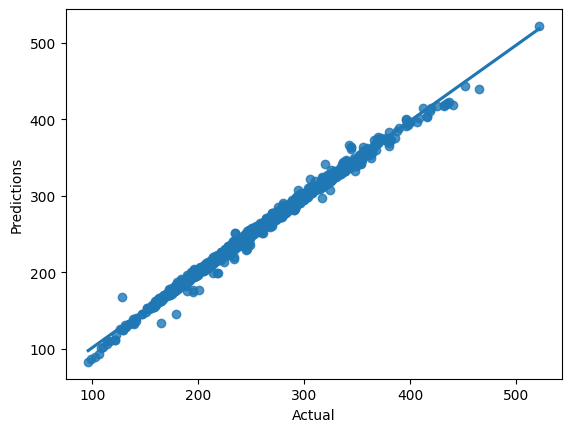

In [64]:
sns.regplot(x='Actual', y='Predictions', data=df)

**Ridge Regression**

In [69]:
rg_model = Ridge(alpha=50, tol=0.001, random_state=42)
rg_model.fit(X_train, y_train)
pred_rg = rg_model.predict(X_test)
print(pred_rg)

[240.31771519 223.0873993  255.47269087 ... 239.52408715 134.28963813
 229.21887948]


In [70]:
print("r2 Score: ", r2_score(y_test, pred_rg))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_rg)))
print("MAE: ", metrics.mean_absolute_error(y_test, pred_rg))
print("MSE: ", metrics.mean_squared_error(y_test, pred_rg))

r2 Score:  0.9932063237032444
RMSE:  4.824164678635892
MAE:  3.227354869022257
MSE:  23.27256484659814


In [71]:
df = pd.DataFrame({'Actual':y_test,'Predictions':pred_rg})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
6307,241,240.0
5036,229,223.0
1995,253,255.0
4156,183,182.0
6328,231,232.0


**Lasso Regression**

In [78]:
ls_model = Lasso(alpha=5, positive=True, selection='random', random_state=42)
ls_model.fit(X_train, y_train)
pred_ls = ls_model.predict(X_test)

In [79]:
print("r2 Score: ", r2_score(y_test, pred_ls))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_ls)))
print("MAE: ", metrics.mean_absolute_error(y_test, pred_ls))
print("MSE: ", metrics.mean_squared_error(y_test, pred_ls))

r2 Score:  0.866052688943792
RMSE:  21.420849970806632
MAE:  15.173825585665265
MSE:  458.8528134718065


In [80]:
df = pd.DataFrame({'Actual':y_test,'Predictions':pred_ls})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
6307,241,244.0
5036,229,205.0
1995,253,256.0
4156,183,200.0
6328,231,238.0


**elasticNet**

In [87]:
en_model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
en_model.fit(X_train, y_train)
pred_en = en_model.predict(X_test)

In [88]:
print("r2 Score: ", r2_score(y_test, pred_en))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred_en)))
print("MAE: ", metrics.mean_absolute_error(y_test, pred_en))
print("MSE: ", metrics.mean_squared_error(y_test, pred_en))

r2 Score:  0.9924607106390646
RMSE:  5.0820028658258725
MAE:  3.3709142405131165
MSE:  25.82675312826238


In [89]:
df = pd.DataFrame({'Actual':y_test,'Predictions':pred_en})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
6307,241,241.0
5036,229,219.0
1995,253,256.0
4156,183,183.0
6328,231,233.0


In [95]:
coefs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
coefs["Abs_Coefficient"] = np.abs(coefs["Coefficient"])
coefs = coefs.sort_values(by="Abs_Coefficient", ascending=False)

print(coefs.head(10))

                             Feature  Coefficient  Abs_Coefficient
88                       fuel type_E   -29.869852        29.869852
4   fuel consumption comb (l/100 km)    23.026166        23.026166
2   fuel consumption city (l/100 km)    21.388178        21.388178
90                       fuel type_X   -15.179027        15.179027
91                       fuel type_Z   -14.410261        14.410261
3    fuel consumption hwy (l/100 km)    12.356314        12.356314
5        fuel consumption comb (mpg)    -7.039878         7.039878
18                         make_FORD     1.622218         1.622218
1                          cylinders     1.450812         1.450812
89                       fuel type_N    -1.430810         1.430810


The feature importance analysis shows that fuel type has the highest impact on the model’s prediction, followed by fuel consumption (combined, city, and highway). In contrast, features such as vehicle class and transmission have relatively lower influence. This suggests that fuel-related features play a major role in determining the target variable.

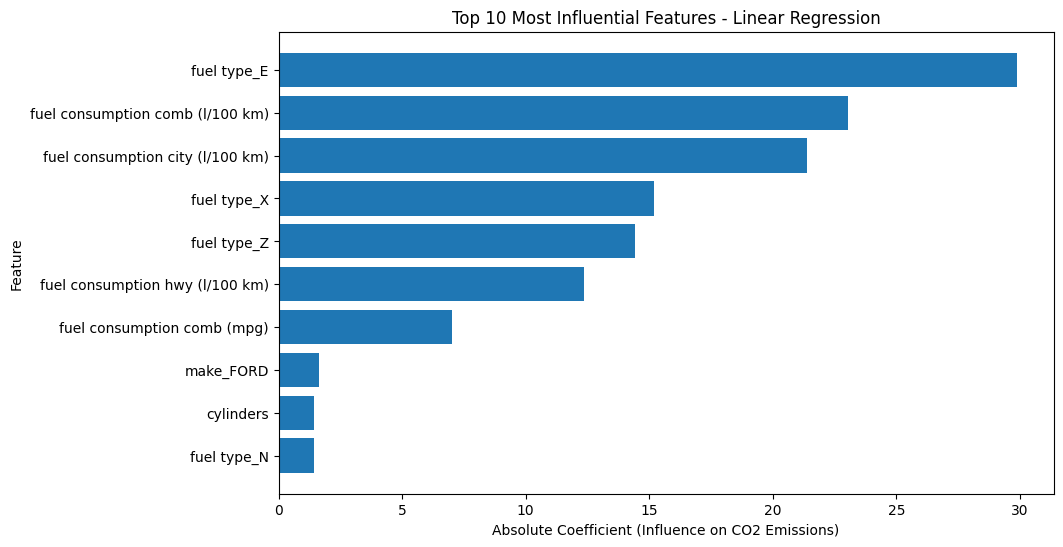

In [96]:
top_features = coefs.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_features["Feature"], top_features["Abs_Coefficient"])
plt.xlabel("Absolute Coefficient (Influence on CO2 Emissions)")
plt.ylabel("Feature")
plt.title("Top 10 Most Influential Features - Linear Regression")
plt.gca().invert_yaxis()
plt.show()

In [97]:
coefs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefs["Original_Feature"] = coefs["Feature"].apply(lambda x: x.split('_')[0])

feature_summary = coefs.groupby("Original_Feature")["Coefficient"].apply(lambda x: np.max(np.abs(x))).sort_values(ascending=False)
print(feature_summary)


Original_Feature
fuel type                           29.869852
fuel consumption comb (l/100 km)    23.026166
fuel consumption city (l/100 km)    21.388178
fuel consumption hwy (l/100 km)     12.356314
fuel consumption comb (mpg)          7.039878
make                                 1.622218
cylinders                            1.450812
engine size(l)                       0.860198
transmission                         0.658371
vehicle class                        0.538932
Name: Coefficient, dtype: float64


**Summary**
---

**Model Evaluated**
* Linear Regression
* Ridge regression (alpha = 50, tol = 0.001)
* Lasso Regression (alpha = 5)
* ElasticNet (alpha = 0.1, l1_ratio = 0.9)

**Performance Metrics**

| Model      | R²     | RMSE   | MAE    |
| ---------- | ------ | ------ | ------ |
| LinearReg  | 0.9942 | 4.463  | 2.890  |
| Ridge      | 0.9932 | 4.824  | 3.227  |
| Lasso      | 0.8661 | 21.421 | 15.174 |
| ElasticNet | 0.9925 | 5.082  | 3.371  |

**Analysis and Conclusion**

* Linear Regression is the best predictive model with the highest R² (0.9942) and lowest RMSE (2.890).
* Ridge and ElasticNet perform almost the same as Linear, but are more resistant to overfitting due to regularization.
* Lasso performs poorly with underfitting, resulting in less accurate predictions.